https://www.kaggle.com/datasets/danielgrijalvas/movies/data

We think one avenue we can go is to use consumer price index for the US (per year) to predict the gross revenue of a movie




In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
cpi = pd.read_csv('https://pkgstore.datahub.io/core/cpi/cpi_csv/data/04cb8fe18892497287d23e20d0e1ceb9/cpi_csv.csv')
cpi = cpi.drop(columns = 'Country Code')
cpi = cpi.loc[cpi['Year'] >= 1986]
cpi = cpi.loc[cpi['Country Name'] == 'United States']
cpi = cpi.drop(columns = 'Country Name')
cpi = cpi.set_index('Year')
cpi.head()



CPI
Year           
1986  50.262433
1987  52.142688
1988  54.233135
1989  56.850970
1990  59.919760

## Three decades of movie data (1986-2014), scraped from IMDb using Python. (220 movies per year, 1986-2014)

In [49]:
movies = pd.read_csv('movies 2.csv')
movies = movies.loc[movies['year'] <= 2014]
movies = movies.loc[movies['country'] == 'United States']

movies = movies.rename(columns={'year': 'Year'})
movies


name rating      genre  Year  \
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
5                                    Friday the 13th      R     Horror  1980   
...                                              ...    ...        ...   ...   
6637                                        Top Five      R     Comedy  2014   
6638                                        99 Homes      R      Drama  2014   
6639                                  Black or White  PG-13      Drama  2014   
6641                                   Big Stone Gap  PG-13     Comedy  2014   
6642                                         Laggies      R     Comedy  2014   

                               released  score      votes            director  \
1          July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2         June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3          July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4         July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5           May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
...                                 ...    ...        ...                 ...   
6637  December 12, 2014 (United States)    6.4    26000.0          Chris Rock   
6638    October 9, 2015 (United States)    7.1    32000.0       Ramin Bahrani   
6639   January 30, 2015 (United States)    6.6    12000.0         Mike Binder   
6641               May 20, 2016 (Spain)    5.7     2800.0    Adriana Trigiani   
6642   October 24, 2014 (United States)    6.4    43000.0        Lynn Shelton   

                       writer             star        country      budget  \
1     Henry De Vere Stacpoole   Brooke Shields  United States   4500000.0   
2              Leigh Brackett      Mark Hamill  United States  18000000.0   
3                Jim Abrahams      Robert Hays  United States   3500000.0   
4          Brian Doyle-Murray      Chevy Chase  United States   6000000.0   
5               Victor Miller     Betsy Palmer  United States    550000.0   
...                       ...              ...            ...         ...   
6637               Chris Rock       Chris Rock  United States  12000000.0   
6638            Ramin Bahrani  Andrew Garfield  United States   8000000.0   
6639              Mike Binder    Kevin Costner  United States   9000000.0   
6641         Adriana Trigiani      Ashley Judd  United States         NaN   
6642            Andrea Seigel  Keira Knightley  United States   5000000.0   

            gross                 company  runtime  
1      58853106.0       Columbia Pictures    104.0  
2     538375067.0               Lucasfilm    124.0  
3      83453539.0      Paramount Pictures     88.0  
4      39846344.0          Orion Pictures     98.0  
5      39754601.0      Paramount Pictures     95.0  
...           ...                     ...      ...  
6637   26117471.0               IAC Films    102.0  
6638    1828232.0    Broad Green Pictures    112.0  
6639   21833967.0              BlackWhite    121.0  
6641    1012804.0  Altar Identity Studios    103.0  
6642    2379154.0       Anonymous Content     99.0  

[4836 rows x 15 columns]

In [50]:
# combining the CPI and movie datasets
merged_df = pd.merge(movies, cpi, on='Year')

In [51]:
nan_values = merged_df.isna().sum()
print(nan_values)

name          0
rating        5
genre         0
Year          0
released      0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget      741
gross        43
company       6
runtime       1
CPI           0
dtype: int64


## this section drops NAN values

In [52]:
merged_df['success'] = (merged_df['gross'] / merged_df['budget']).apply(lambda x: 1 if x > 2 else 0)

merged_df = merged_df.dropna(subset=['budget'])
nan_count = merged_df['score'].isna().sum()

merged_df.head()

name rating      genre  Year  \
0                      Top Gun     PG     Action  1986   
1                  Stand by Me      R  Adventure  1986   
2     Ferris Bueller's Day Off  PG-13     Comedy  1986   
3  Big Trouble in Little China  PG-13     Action  1986   
4               Pretty in Pink  PG-13     Comedy  1986   

                            released  score     votes        director  \
0       May 16, 1986 (United States)    6.9  306000.0      Tony Scott   
1    August 22, 1986 (United States)    8.1  374000.0      Rob Reiner   
2      June 11, 1986 (United States)    7.8  330000.0     John Hughes   
3       July 2, 1986 (United States)    7.3  128000.0  John Carpenter   
4  February 28, 1986 (United States)    6.8   76000.0   Howard Deutch   

         writer               star        country      budget        gross  \
0      Jim Cash         Tom Cruise  United States  15000000.0  357288178.0   
1  Stephen King        Wil Wheaton  United States   8000000.0   52287414.0   
2   John Hughes  Matthew Broderick  United States   6000000.0   70720215.0   
3  Gary Goldman       Kurt Russell  United States  25000000.0   11100577.0   
4   John Hughes     Molly Ringwald  United States   9000000.0   40479480.0   

                 company  runtime        CPI  success  
0     Paramount Pictures    110.0  50.262433        1  
1      Columbia Pictures     89.0  50.262433        1  
2     Paramount Pictures    103.0  50.262433        1  
3  Twentieth Century Fox     99.0  50.262433        0  
4     Paramount Pictures     97.0  50.262433        1

In [53]:
nan_values = merged_df.isna().sum()
print(nan_values)

name         0
rating       4
genre        0
Year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross       23
company      1
runtime      1
CPI          0
success      0
dtype: int64


## Cleaning Steps

In [54]:
# Converting 'budget' to numeric
merged_df['budget'] = pd.to_numeric(merged_df['budget'], errors='coerce')
rnn_df=merged_df.copy()
# Previewing the cleaned dataset
merged_df.head()

name rating      genre  Year  \
0                      Top Gun     PG     Action  1986   
1                  Stand by Me      R  Adventure  1986   
2     Ferris Bueller's Day Off  PG-13     Comedy  1986   
3  Big Trouble in Little China  PG-13     Action  1986   
4               Pretty in Pink  PG-13     Comedy  1986   

                            released  score     votes        director  \
0       May 16, 1986 (United States)    6.9  306000.0      Tony Scott   
1    August 22, 1986 (United States)    8.1  374000.0      Rob Reiner   
2      June 11, 1986 (United States)    7.8  330000.0     John Hughes   
3       July 2, 1986 (United States)    7.3  128000.0  John Carpenter   
4  February 28, 1986 (United States)    6.8   76000.0   Howard Deutch   

         writer               star        country      budget        gross  \
0      Jim Cash         Tom Cruise  United States  15000000.0  357288178.0   
1  Stephen King        Wil Wheaton  United States   8000000.0   52287414.0   
2   John Hughes  Matthew Broderick  United States   6000000.0   70720215.0   
3  Gary Goldman       Kurt Russell  United States  25000000.0   11100577.0   
4   John Hughes     Molly Ringwald  United States   9000000.0   40479480.0   

                 company  runtime        CPI  success  
0     Paramount Pictures    110.0  50.262433        1  
1      Columbia Pictures     89.0  50.262433        1  
2     Paramount Pictures    103.0  50.262433        1  
3  Twentieth Century Fox     99.0  50.262433        0  
4     Paramount Pictures     97.0  50.262433        1

In [55]:
nan_values = merged_df.isna().sum()
print(nan_values)

name         0
rating       4
genre        0
Year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross       23
company      1
runtime      1
CPI          0
success      0
dtype: int64


## EDA

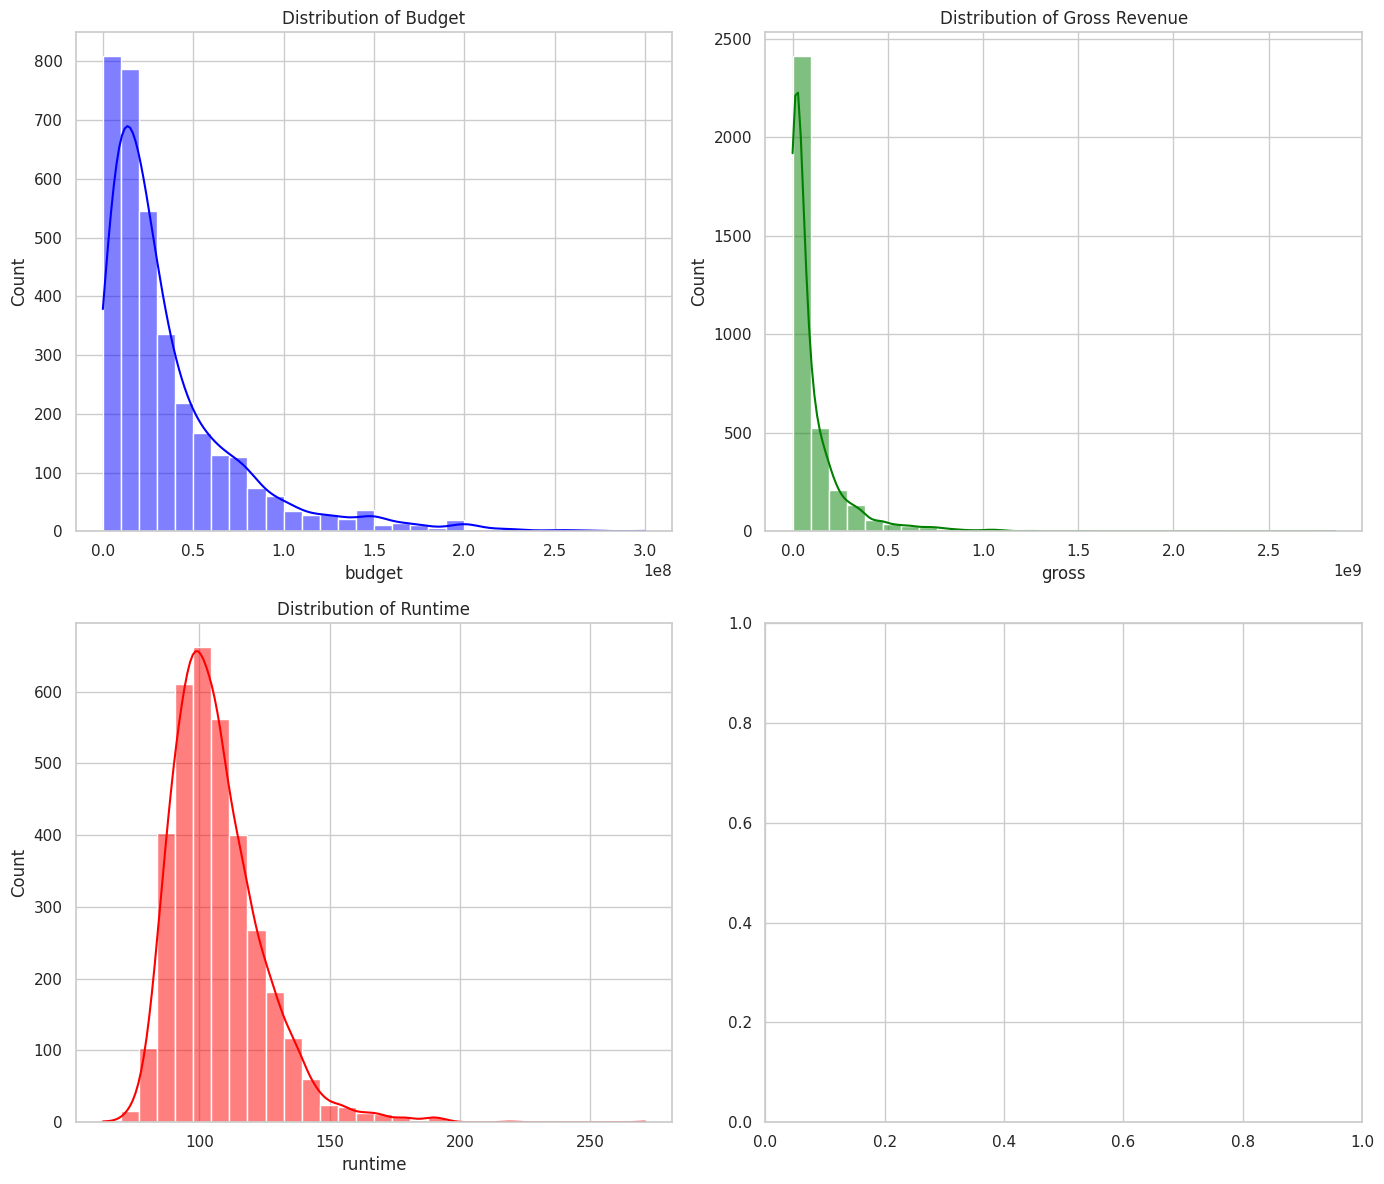

In [56]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# 1. Distribution of Numerical Features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.histplot(data=merged_df, x='budget', bins=30, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribution of Budget')
sns.histplot(data=merged_df, x='gross', bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribution of Gross Revenue')
sns.histplot(data=merged_df, x='runtime', bins=30, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribution of Runtime')
plt.tight_layout()
plt.show()


The histograms above provide insights into the distribution of budget, revenue, runtime, and number of production companies:

Budget: Most movies have a budget less than 100 million, with a peak at lower budgets.

Revenue: A similar trend is observed in revenue, with most movies earning less than 100 million.

Runtime: The majority of movies have a runtime around 90 to 120 minutes.

MODEL 1: LINEAR REGRESSION

In [57]:
from sklearn.model_selection import train_test_split
merged_df['gross_log'] = np.log(merged_df['gross'])
merged_df

# Split the data into training and testing sets
train, test = train_test_split(merged_df, test_size=0.3, random_state=42)

This is predicting gross revenue

In [58]:
import statsmodels.formula.api as smf

#should we of genre and/or rating ... some of them were statistically sig, others were not.

model = smf.ols(formula='gross_log ~ CPI + budget + score',
                 data=train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              gross_log   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     546.9
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.99e-271
Time:                        20:45:49   Log-Likelihood:                -4327.9
No. Observations:                2416   AIC:                             8664.
Df Residuals:                    2412   BIC:                             8687.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3234      0.246     54.089      0.0

In [59]:

# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)


cols = ['CPI', 'budget', 'score']
VIF(train, cols)

# when we ran VIF, a lot of the movies didn't have a budget included because of (blank) reasons. Our first thoughts were to do score, budget and CPI

CPI       1.108618
budget    1.117373
score     1.008611
dtype: float64

## This is predicting success

In [60]:
model = smf.ols(formula='success ~ CPI + budget + score',
                 data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                success   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     77.11
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.21e-47
Time:                        20:45:49   Log-Likelihood:                -1651.8
No. Observations:                2433   AIC:                             3312.
Df Residuals:                    2429   BIC:                             3335.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6573      0.080     -8.187      0.0

In [61]:
merged_df

name rating      genre  Year  \
0                         Top Gun     PG     Action  1986   
1                     Stand by Me      R  Adventure  1986   
2        Ferris Bueller's Day Off  PG-13     Comedy  1986   
3     Big Trouble in Little China  PG-13     Action  1986   
4                  Pretty in Pink  PG-13     Comedy  1986   
...                           ...    ...        ...   ...   
4212        Planes: Fire & Rescue     PG  Animation  2014   
4213                     Top Five      R     Comedy  2014   
4214                     99 Homes      R      Drama  2014   
4215               Black or White  PG-13      Drama  2014   
4217                      Laggies      R     Comedy  2014   

                               released  score     votes          director  \
0          May 16, 1986 (United States)    6.9  306000.0        Tony Scott   
1       August 22, 1986 (United States)    8.1  374000.0        Rob Reiner   
2         June 11, 1986 (United States)    7.8  330000.0       John Hughes   
3          July 2, 1986 (United States)    7.3  128000.0    John Carpenter   
4     February 28, 1986 (United States)    6.8   76000.0     Howard Deutch   
...                                 ...    ...       ...               ...   
4212      July 18, 2014 (United States)    6.0   17000.0  Roberts Gannaway   
4213  December 12, 2014 (United States)    6.4   26000.0        Chris Rock   
4214    October 9, 2015 (United States)    7.1   32000.0     Ramin Bahrani   
4215   January 30, 2015 (United States)    6.6   12000.0       Mike Binder   
4217   October 24, 2014 (United States)    6.4   43000.0      Lynn Shelton   

                writer               star        country      budget  \
0             Jim Cash         Tom Cruise  United States  15000000.0   
1         Stephen King        Wil Wheaton  United States   8000000.0   
2          John Hughes  Matthew Broderick  United States   6000000.0   
3         Gary Goldman       Kurt Russell  United States  25000000.0   
4          John Hughes     Molly Ringwald  United States   9000000.0   
...                ...                ...            ...         ...   
4212  Roberts Gannaway          Dane Cook  United States  50000000.0   
4213        Chris Rock         Chris Rock  United States  12000000.0   
4214     Ramin Bahrani    Andrew Garfield  United States   8000000.0   
4215       Mike Binder      Kevin Costner  United States   9000000.0   
4217     Andrea Seigel    Keira Knightley  United States   5000000.0   

            gross                company  runtime         CPI  success  \
0     357288178.0     Paramount Pictures    110.0   50.262433        1   
1      52287414.0      Columbia Pictures     89.0   50.262433        1   
2      70720215.0     Paramount Pictures    103.0   50.262433        1   
3      11100577.0  Twentieth Century Fox     99.0   50.262433        0   
4      40479480.0     Paramount Pictures     97.0   50.262433        1   
...           ...                    ...      ...         ...      ...   
4212  146965787.0     Disneytoon Studios     83.0  108.566932        1   
4213   26117471.0              IAC Films    102.0  108.566932        1   
4214    1828232.0   Broad Green Pictures    112.0  108.566932        0   
4215   21833967.0             BlackWhite    121.0  108.566932        1   
4217    2379154.0      Anonymous Content     99.0  108.566932        0   

      gross_log  
0     19.694053  
1     17.772266  
2     18.074242  
3     16.222508  
4     17.516306  
...         ...  
4212  18.805710  
4213  17.078115  
4214  14.418860  
4215  16.898977  
4217  14.682256  

[3477 rows x 18 columns]

###Random Forest

In [62]:
from dateutil import parser

merged_df['released'] = merged_df['released'].astype(str).apply(lambda x: parser.parse(x, fuzzy=True))

merged_df['year'] = merged_df['released'].dt.year
merged_df['month'] = merged_df['released'].dt.month
merged_df['day'] = merged_df['released'].dt.day

merged_df.head()


name rating      genre  Year   released  score  \
0                      Top Gun     PG     Action  1986 1986-05-16    6.9   
1                  Stand by Me      R  Adventure  1986 1986-08-22    8.1   
2     Ferris Bueller's Day Off  PG-13     Comedy  1986 1986-06-11    7.8   
3  Big Trouble in Little China  PG-13     Action  1986 1986-07-02    7.3   
4               Pretty in Pink  PG-13     Comedy  1986 1986-02-28    6.8   

      votes        director        writer               star  ...      budget  \
0  306000.0      Tony Scott      Jim Cash         Tom Cruise  ...  15000000.0   
1  374000.0      Rob Reiner  Stephen King        Wil Wheaton  ...   8000000.0   
2  330000.0     John Hughes   John Hughes  Matthew Broderick  ...   6000000.0   
3  128000.0  John Carpenter  Gary Goldman       Kurt Russell  ...  25000000.0   
4   76000.0   Howard Deutch   John Hughes     Molly Ringwald  ...   9000000.0   

         gross                company runtime        CPI  success  gross_log  \
0  357288178.0     Paramount Pictures   110.0  50.262433        1  19.694053   
1   52287414.0      Columbia Pictures    89.0  50.262433        1  17.772266   
2   70720215.0     Paramount Pictures   103.0  50.262433        1  18.074242   
3   11100577.0  Twentieth Century Fox    99.0  50.262433        0  16.222508   
4   40479480.0     Paramount Pictures    97.0  50.262433        1  17.516306   

   year  month  day  
0  1986      5   16  
1  1986      8   22  
2  1986      6   11  
3  1986      7    2  
4  1986      2   28  

[5 rows x 21 columns]

In [63]:
nan_values = merged_df.isna().sum()
print(nan_values)

name          0
rating        4
genre         0
Year          0
released      0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget        0
gross        23
company       1
runtime       1
CPI           0
success       0
gross_log    23
year          0
month         0
day           0
dtype: int64


In [64]:
merged_df.dropna(inplace=True)
nan_values = merged_df.isna().sum()
print(nan_values)


name         0
rating       0
genre        0
Year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
CPI          0
success      0
gross_log    0
year         0
month        0
day          0
dtype: int64


In [65]:
merged_rf = merged_df

here

In [95]:
# converting day of the week
from datetime import datetime
merged_rf['released'] = pd.to_datetime(merged_rf['released'])

def get_day_of_week(date):
    return date.strftime('%A')

merged_rf['dayofweek'] = merged_rf['released'].apply(get_day_of_week)
rnn_df=merged_df.copy()
print(merged_rf['dayofweek'])

0          Friday
1          Friday
2       Wednesday
3       Wednesday
4          Friday
          ...    
4212       Friday
4213       Friday
4214       Friday
4215       Friday
4217       Friday
Name: dayofweek, Length: 3448, dtype: object


In [96]:
X = merged_rf[['rating', 'genre', 'score', 'votes', 'budget', 'company', 'runtime','CPI', 'month', 'dayofweek']]
y = merged_rf['gross_log']


In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['rating'] = label_encoder.fit_transform(X['rating'])
X['genre'] = label_encoder.fit_transform(X['genre'])
X['company'] = label_encoder.fit_transform(X['company'])
X['dayofweek'] = label_encoder.fit_transform(X['dayofweek'])

X


/tmp/ipykernel_314061/1981238103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rating'] = label_encoder.fit_transform(X['rating'])
/tmp/ipykernel_314061/1981238103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['genre'] = label_encoder.fit_transform(X['genre'])
/tmp/ipykernel_314061/1981238103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

rating  genre  score     votes      budget  company  runtime  \
0          3      0    6.9  306000.0  15000000.0      649    110.0   
1          5      1    8.1  374000.0   8000000.0      258     89.0   
2          4      4    7.8  330000.0   6000000.0      649    103.0   
3          4      0    7.3  128000.0  25000000.0      800     99.0   
4          4      4    6.8   76000.0   9000000.0      649     97.0   
...      ...    ...    ...       ...         ...      ...      ...   
4212       3      2    6.0   17000.0  50000000.0      309     83.0   
4213       5      4    6.4   26000.0  12000000.0      462    102.0   
4214       5      6    7.1   32000.0   8000000.0      164    112.0   
4215       4      6    6.6   12000.0   9000000.0      139    121.0   
4217       5      4    6.4   43000.0   5000000.0       72     99.0   

             CPI  month  dayofweek  
0      50.262433      5          0  
1      50.262433      8          0  
2      50.262433      6          6  
3      50.262433      7          6  
4      50.262433      2          0  
...          ...    ...        ...  
4212  108.566932      7          0  
4213  108.566932     12          0  
4214  108.566932     10          0  
4215  108.566932      1          0  
4217  108.566932     10          0  

[3448 rows x 10 columns]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

rating  genre  score     votes       budget  company  runtime  \
59         5      0    5.8    4700.0   18000000.0      681    115.0   
2328       4      1    5.6   31000.0   13000000.0      113     84.0   
4116       4      0    5.6  302000.0  210000000.0      649    165.0   
3065       5      6    8.2  535000.0   25000000.0      650    158.0   
3801       5      0    7.4  545000.0   30000000.0      794    113.0   
...      ...    ...    ...       ...          ...      ...      ...   
1592       5      4    5.4   14000.0   13000000.0      809     87.0   
1641       5      6    5.8   14000.0   47000000.0      600    108.0   
1850       5      5    6.5   81000.0   60000000.0      823    107.0   
1284       3      6    7.5    7400.0    3000000.0      506    103.0   
3910       3      4    6.0   25000.0   25000000.0      800    105.0   

             CPI  month  dayofweek  
59     50.262433      4          0  
2328   81.202568      8          0  
4116  108.566932      6          0  
3065   95.086992      1          0  
3801  105.291505      9          0  
...          ...    ...        ...  
1592   71.931229      8          0  
1641   71.931229      2          0  
1850   74.755433      6          0  
1284   67.975813      2          0  
3910  105.291505     12          5  

[2758 rows x 10 columns]

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd



rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 1.1016243064283615
R-squared: 0.6805916148993995


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1, n_iter=20)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}") #Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 80}
print(f"Best Negative Mean Squared Error: {best_score}") #Best Negative Mean Squared Error: -0.9763526515834959



Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 70}
Best Negative Mean Squared Error: -0.9831371920640896


In [72]:
rf_model = RandomForestRegressor(n_estimators=400, min_samples_split= 10, min_samples_leaf = 5, max_depth = 80)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}") #Mean Squared Error: 1.0698823766350398
print(f"R-squared: {r_squared}") #R-squared: 0.6897949689613052




Mean Squared Error: 1.069195382042908
R-squared: 0.6899941583146675


# RNN

In [100]:
rnn_df

name rating      genre  Year   released  score  \
0                         Top Gun     PG     Action  1986 1986-05-16    6.9   
1                     Stand by Me      R  Adventure  1986 1986-08-22    8.1   
2        Ferris Bueller's Day Off  PG-13     Comedy  1986 1986-06-11    7.8   
3     Big Trouble in Little China  PG-13     Action  1986 1986-07-02    7.3   
4                  Pretty in Pink  PG-13     Comedy  1986 1986-02-28    6.8   
...                           ...    ...        ...   ...        ...    ...   
4212        Planes: Fire & Rescue     PG  Animation  2014 2014-07-18    6.0   
4213                     Top Five      R     Comedy  2014 2014-12-12    6.4   
4214                     99 Homes      R      Drama  2014 2015-10-09    7.1   
4215               Black or White  PG-13      Drama  2014 2015-01-30    6.6   
4217                      Laggies      R     Comedy  2014 2014-10-24    6.4   

         votes          director            writer               star  ...  \
0     306000.0        Tony Scott          Jim Cash         Tom Cruise  ...   
1     374000.0        Rob Reiner      Stephen King        Wil Wheaton  ...   
2     330000.0       John Hughes       John Hughes  Matthew Broderick  ...   
3     128000.0    John Carpenter      Gary Goldman       Kurt Russell  ...   
4      76000.0     Howard Deutch       John Hughes     Molly Ringwald  ...   
...        ...               ...               ...                ...  ...   
4212   17000.0  Roberts Gannaway  Roberts Gannaway          Dane Cook  ...   
4213   26000.0        Chris Rock        Chris Rock         Chris Rock  ...   
4214   32000.0     Ramin Bahrani     Ramin Bahrani    Andrew Garfield  ...   
4215   12000.0       Mike Binder       Mike Binder      Kevin Costner  ...   
4217   43000.0      Lynn Shelton     Andrea Seigel    Keira Knightley  ...   

            gross                company  runtime         CPI  success  \
0     357288178.0     Paramount Pictures    110.0   50.262433        1   
1      52287414.0      Columbia Pictures     89.0   50.262433        1   
2      70720215.0     Paramount Pictures    103.0   50.262433        1   
3      11100577.0  Twentieth Century Fox     99.0   50.262433        0   
4      40479480.0     Paramount Pictures     97.0   50.262433        1   
...           ...                    ...      ...         ...      ...   
4212  146965787.0     Disneytoon Studios     83.0  108.566932        1   
4213   26117471.0              IAC Films    102.0  108.566932        1   
4214    1828232.0   Broad Green Pictures    112.0  108.566932        0   
4215   21833967.0             BlackWhite    121.0  108.566932        1   
4217    2379154.0      Anonymous Content     99.0  108.566932        0   

      gross_log  year  month  day  dayofweek  
0     19.694053  1986      5   16     Friday  
1     17.772266  1986      8   22     Friday  
2     18.074242  1986      6   11  Wednesday  
3     16.222508  1986      7    2  Wednesday  
4     17.516306  1986      2   28     Friday  
...         ...   ...    ...  ...        ...  
4212  18.805710  2014      7   18     Friday  
4213  17.078115  2014     12   12     Friday  
4214  14.418860  2015     10    9     Friday  
4215  16.898977  2015      1   30     Friday  
4217  14.682256  2014     10   24     Friday  

[3448 rows x 22 columns]

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [114]:

X = rnn_df[['rating', 'genre', 'score', 'votes', 'budget', 'company', 'runtime','CPI', 'month', 'dayofweek']]
X['rating'] = label_encoder.fit_transform(X['rating'])
X['genre'] = label_encoder.fit_transform(X['genre'])
X['company'] = label_encoder.fit_transform(X['company'])
X['dayofweek'] = label_encoder.fit_transform(X['dayofweek'])

y =  rnn_df['gross_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

/tmp/ipykernel_314061/1684573305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rating'] = label_encoder.fit_transform(X['rating'])
/tmp/ipykernel_314061/1684573305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['genre'] = label_encoder.fit_transform(X['genre'])
/tmp/ipykernel_314061/1684573305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

rating  genre  score     votes       budget  company  runtime  \
59         5      0    5.8    4700.0   18000000.0      681    115.0   
2328       4      1    5.6   31000.0   13000000.0      113     84.0   
4116       4      0    5.6  302000.0  210000000.0      649    165.0   
3065       5      6    8.2  535000.0   25000000.0      650    158.0   
3801       5      0    7.4  545000.0   30000000.0      794    113.0   
...      ...    ...    ...       ...          ...      ...      ...   
1592       5      4    5.4   14000.0   13000000.0      809     87.0   
1641       5      6    5.8   14000.0   47000000.0      600    108.0   
1850       5      5    6.5   81000.0   60000000.0      823    107.0   
1284       3      6    7.5    7400.0    3000000.0      506    103.0   
3910       3      4    6.0   25000.0   25000000.0      800    105.0   

             CPI  month  dayofweek  
59     50.262433      4          0  
2328   81.202568      8          0  
4116  108.566932      6          0  
3065   95.086992      1          0  
3801  105.291505      9          0  
...          ...    ...        ...  
1592   71.931229      8          0  
1641   71.931229      2          0  
1850   74.755433      6          0  
1284   67.975813      2          0  
3910  105.291505     12          5  

[2758 rows x 10 columns]

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [148]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=1000, batch_size=200, validation_data=(X_test_scaled, y_test),verbose=0)

test_loss = model.evaluate(X_test_scaled, y_test)
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}") 
print(f"R-squared: {r_squared}") 



22/22 [==============================] - 0s 957us/step
Mean Squared Error: 0.9812039148894494
R-squared: 0.7155066785650969


epoch= 100. batch size 32
Mean Squared Error: 1.0740076667466656
R-squared: 0.6885988694880665

epoch= 1000. batch size 200 (optimal)
Mean Squared Error: 0.9812039148894494
R-squared: 0.7155066785650969

epoch= 5000. batch size 400
Mean Squared Error: 1.2119616751978026
R-squared: 0.6486000542836403

# Time Series

In [149]:
time_series_df=merged_df
time_series_df['year'] = merged_df['released'].dt.year


In [150]:
time_series_df.head(100)

name rating      genre  Year   released  score  \
0                        Top Gun     PG     Action  1986 1986-05-16    6.9   
1                    Stand by Me      R  Adventure  1986 1986-08-22    8.1   
2       Ferris Bueller's Day Off  PG-13     Comedy  1986 1986-06-11    7.8   
3    Big Trouble in Little China  PG-13     Action  1986 1986-07-02    7.3   
4                 Pretty in Pink  PG-13     Comedy  1986 1986-02-28    6.8   
..                           ...    ...        ...   ...        ...    ...   
160      Masters of the Universe     PG     Action  1987 1987-08-07    5.4   
161             Fatal Attraction      R      Drama  1987 1987-09-18    6.9   
162            Empire of the Sun     PG     Action  1987 1987-12-25    7.7   
163                   No Way Out      R     Action  1987 1987-08-14    7.1   
164      The Witches of Eastwick      R     Comedy  1987 1987-06-12    6.6   

        votes          director           writer               star  ...  \
0    306000.0        Tony Scott         Jim Cash         Tom Cruise  ...   
1    374000.0        Rob Reiner     Stephen King        Wil Wheaton  ...   
2    330000.0       John Hughes      John Hughes  Matthew Broderick  ...   
3    128000.0    John Carpenter     Gary Goldman       Kurt Russell  ...   
4     76000.0     Howard Deutch      John Hughes     Molly Ringwald  ...   
..        ...               ...              ...                ...  ...   
160   38000.0      Gary Goddard      David Odell     Dolph Lundgren  ...   
161   79000.0       Adrian Lyne    James Dearden    Michael Douglas  ...   
162  119000.0  Steven Spielberg     Tom Stoppard     Christian Bale  ...   
163   37000.0   Roger Donaldson  Kenneth Fearing      Kevin Costner  ...   
164   65000.0     George Miller      John Updike     Jack Nicholson  ...   

           gross                   company  runtime        CPI  success  \
0    357288178.0        Paramount Pictures    110.0  50.262433        1   
1     52287414.0         Columbia Pictures     89.0  50.262433        1   
2     70720215.0        Paramount Pictures    103.0  50.262433        1   
3     11100577.0     Twentieth Century Fox     99.0  50.262433        0   
4     40479480.0        Paramount Pictures     97.0  50.262433        1   
..           ...                       ...      ...        ...      ...   
160   17336370.0  Golan-Globus Productions    106.0  52.142688        0   
161  320145693.0        Paramount Pictures    119.0  52.142688        1   
162   22238696.0      Amblin Entertainment    153.0  52.142688        0   
163   35509515.0            Orion Pictures    114.0  52.142688        1   
164   63766510.0              Warner Bros.    118.0  52.142688        1   

     gross_log  year  month  day  dayofweek  
0    19.694053  1986      5   16     Friday  
1    17.772266  1986      8   22     Friday  
2    18.074242  1986      6   11  Wednesday  
3    16.222508  1986      7    2  Wednesday  
4    17.516306  1986      2   28     Friday  
..         ...   ...    ...  ...        ...  
160  16.668317  1987      8    7     Friday  
161  19.584287  1987      9   18     Friday  
162  16.917344  1987     12   25     Friday  
163  17.385311  1987      8   14     Friday  
164  17.970739  1987      6   12     Friday  

[100 rows x 22 columns]

In [151]:
time_series_df['year'].unique()

array([1986, 1987, 1990, 1988, 1992, 1989, 1991, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2019, 2004, 2005, 2006,
       2007, 2008, 2010, 2009, 2015, 2011, 2012, 2013, 2014, 2016],
      dtype=int32)

In [152]:
ts_train= time_series_df[time_series_df['released'].dt.year  < 2016]
ts_test = time_series_df[time_series_df['released'].dt.year  >= 2016]
print(ts_train.shape,ts_test.shape)

(3446, 22) (2, 22)


In [153]:
def plot_entire_series(x, y, **kwargs):

    plt.figure(figsize=(32, 4))
    plt.plot(x, y, linewidth=2, color='black')

    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)

    plt.xlabel('Date', fontsize=16)
    plt.ylabel('gross', fontsize=16)
    plt.show()

    return None

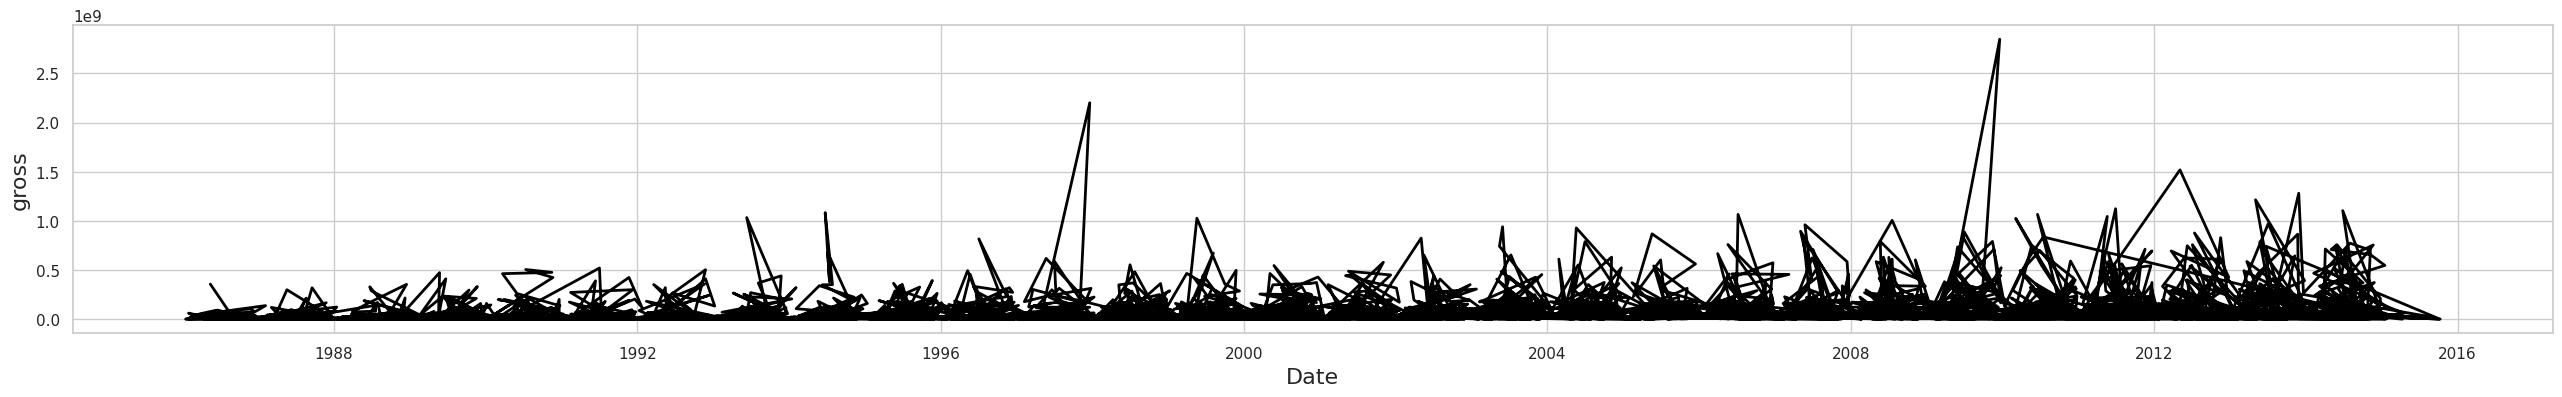

In [154]:
x = ts_train['released'].to_numpy()
y = ts_train['gross'].to_numpy()

plot_entire_series(x, y)

Random Walk

In [79]:
ts_train_rw=ts_train.copy()
ts_train_rw=ts_train_rw.sort_values(by='year')
ts_train_rw['predicted_gross']=ts_train_rw['gross'].shift(1)
ts_train_rw['predicted_gross'] += np.random.normal(0, ts_train_rw['gross'].std(), ts_train_rw.shape[0])
ts_train_rw.head(10)

name rating   genre  Year   released  score  \
0                         Top Gun     PG  Action  1986 1986-05-16    6.9   
73                            F/X      R  Action  1986 1986-02-07    6.7   
72            Armed and Dangerous  PG-13  Action  1986 1986-08-15    5.7   
71                  Club Paradise  PG-13  Comedy  1986 1986-07-11    5.1   
70                       No Mercy      R   Crime  1986 1986-12-19    5.7   
68               April Fool's Day      R  Horror  1986 1986-03-28    6.2   
67  Down and Out in Beverly Hills      R  Comedy  1986 1986-01-31    6.2   
66             Invaders from Mars     PG  Horror  1986 1986-06-06    5.6   
75                      Wise Guys      R  Comedy  1986 1986-04-18    5.7   
65       Children of a Lesser God      R   Drama  1986 1986-10-31    7.2   

       votes        director               writer             star  ...  \
0   306000.0      Tony Scott             Jim Cash       Tom Cruise  ...   
73   18000.0   Robert Mandel  Robert T. Megginson      Bryan Brown  ...   
72   11000.0  Mark L. Lester         Brian Grazer       John Candy  ...   
71    5900.0    Harold Ramis        Harry Shearer   Robin Williams  ...   
70    7000.0  Richard Pearce     James Carabatsos     Richard Gere  ...   
68   15000.0     Fred Walton          Danilo Bach  Deborah Foreman  ...   
67   16000.0   Paul Mazursky        René Fauchois       Nick Nolte  ...   
66    8200.0     Tobe Hooper        Richard Blake      Karen Black  ...   
75    5500.0  Brian De Palma         George Gallo     Danny DeVito  ...   
65   15000.0    Randa Haines          Mark Medoff     William Hurt  ...   

                      company  runtime        CPI success  gross_log  year  \
0          Paramount Pictures    110.0  50.262433       1  19.694053  1986   
73             Orion Pictures    109.0  50.262433       1  16.840982  1986   
72          Columbia Pictures     88.0  50.262433       0  16.584689  1986   
71               Warner Bros.     96.0  50.262433       0  16.325802  1986   
70           TriStar Pictures    106.0  50.262433       0  16.325427  1986   
68         Paramount Pictures     89.0  50.262433       1  16.376434  1986   
67        Touchstone Pictures    103.0  50.262433       1  17.944808  1986   
66            Cannon Pictures    100.0  50.262433       0  15.401611  1986   
75  Metro-Goldwyn-Mayer (MGM)    100.0  50.262433       0  15.952686  1986   
65         Paramount Pictures    119.0  50.262433       1  17.276645  1986   

    month  day  dayofweek  predicted_gross  
0       5   16     Friday              NaN  
73      2    7     Friday     1.766377e+08  
72      8   15     Friday    -1.890468e+08  
71      7   11     Friday     6.094275e+07  
70     12   19     Friday     1.108091e+08  
68      3   28     Friday    -2.854740e+07  
67      1   31     Friday     1.206444e+08  
66      6    6     Friday     1.343842e+08  
75      4   18     Friday    -5.089352e+07  
65     10   31     Friday     2.027759e+07  

[10 rows x 23 columns]

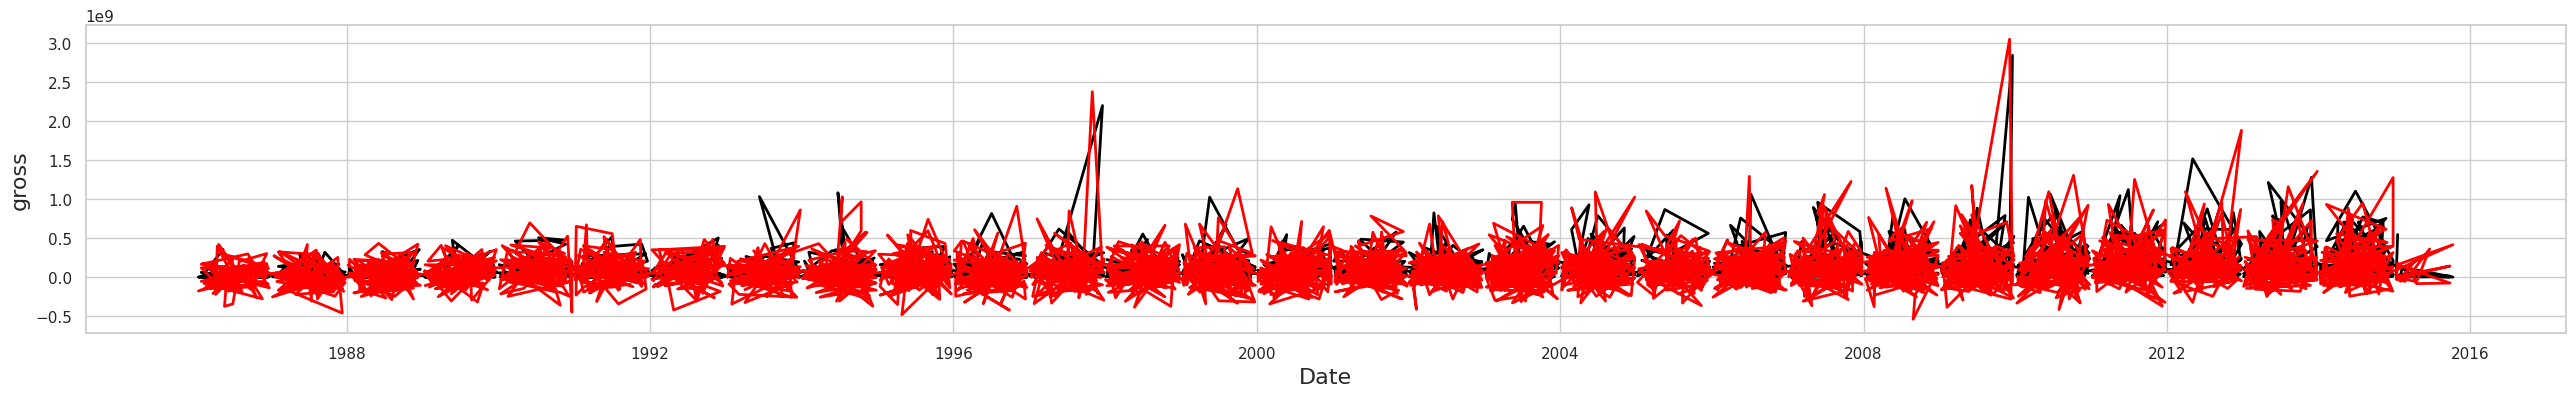

In [80]:
x = ts_train_rw['released'].to_numpy()
y = ts_train_rw['gross'].to_numpy()
y_pred = ts_train_rw['predicted_gross'].to_numpy()

plot_entire_series(x, y, red=y_pred)

In [81]:
def plot_last_fifty(x, y, **kwargs):

    plt.figure(figsize=(16, 4))
    plt.scatter(x[-50:], y[-50:], linewidth=3, color='black')
    plt.plot(x[-50:], y[-50:], linewidth=3, color='black')

    for key, value in kwargs.items():
        plt.plot(x[-50:], value[-50:], linewidth=3, color=key)

    plt.xlabel('Date', fontsize=16)
    plt.ylabel('gross', fontsize=16)
    plt.show()

    return None

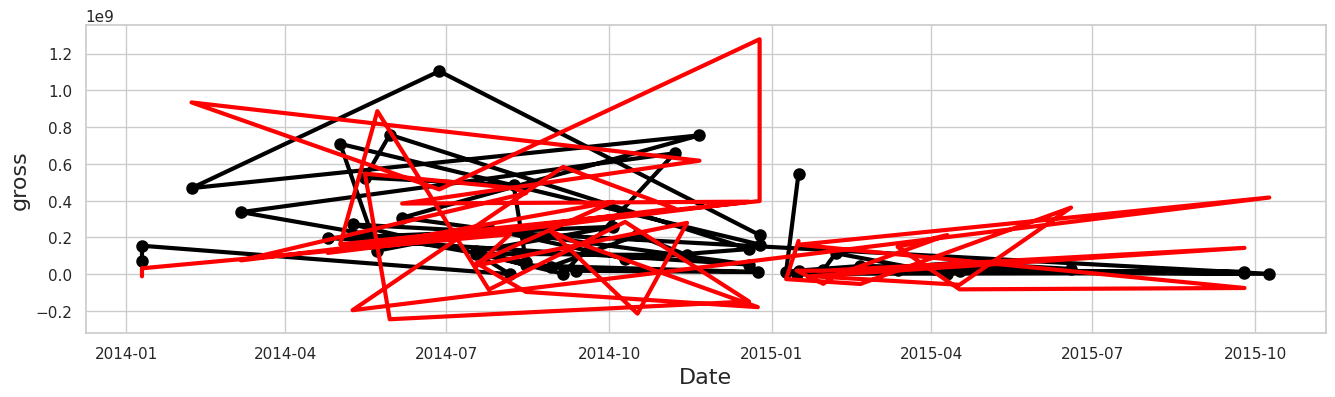

In [82]:
plot_last_fifty(x, y, red=y_pred)

In [83]:
from sklearn.metrics import r2_score
print((abs(ts_train_rw['gross'] - ts_train_rw['predicted_gross']) >= 100000000).value_counts())



True     2155
False    1291
Name: count, dtype: int64


In [93]:


predicted_values = ts_train_rw['predicted_gross'].dropna()
min_length = min(len(actual_values), len(predicted_values))
actual_values = actual_values.iloc[:min_length]
predicted_values = predicted_values.iloc[:min_length]

r2 = r2_score(actual_values, predicted_values)
print("R^2 Score:", r2)



NameError: name 'actual_values' is not defined


The low R² indicates the Random Walk model is unsuitable for predicting movie gross revenues.

Auto Regressive


In [ ]:
gross_train_ar=ts_train_rw.copy()

In [ ]:
ar1 = smf.ols(formula='gross ~ predicted_gross', data=gross_train_ar).fit()
print(ar1.summary())

In [ ]:
x = gross_train_ar['released'].to_numpy()
y = gross_train_ar['gross'].to_numpy()
y_pred = ar1.predict(gross_train_ar).to_numpy()

plot_entire_series(x, y, red=y_pred)
plot_last_fifty(x, y, red=y_pred)

The low R-squared indicate limited effectiveness of the Auto Regressive model for gross prediction.